In [ ]:
import pandas as pd

campaign = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bank.csv')

In [ ]:
campaign

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [ ]:
campaign["cons.price.idx"].value_counts()

93.994    7763
93.918    6685
92.893    5794
93.444    5175
94.465    4374
93.200    3616
93.075    2458
92.201     770
92.963     715
92.431     447
92.649     357
94.215     311
94.199     303
92.843     282
92.379     267
93.369     264
94.027     233
94.055     229
93.876     212
94.601     204
92.469     178
93.749     174
92.713     172
94.767     128
93.798      67
92.756      10
Name: cons.price.idx, dtype: int64

In [ ]:
campaign.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [ ]:
#@title Columns to Consider
include_age = True #@param {type:"boolean"}
include_job = True #@param {type:"boolean"}
include_marital = True #@param {type:"boolean"}
include_education = True #@param {type:"boolean"}
include_default = True #@param {type:"boolean"}
include_housing = True #@param {type:"boolean"}
include_loan = True #@param {type:"boolean"}
include_contact = True #@param {type:"boolean"}
include_month = True #@param {type:"boolean"}
include_day_of_week = True #@param {type:"boolean"}
include_campaign = True #@param {type:"boolean"}
include_pdays = True #@param {type:"boolean"}
include_previous = True #@param {type:"boolean"}
include_poutcome = True #@param {type:"boolean"}
include_employment_variation_rate = True #@param {type:"boolean"}
include_consumer_price_index = True #@param {type:"boolean"}
include_consumer_confidence_index = True #@param {type:"boolean"}
include_euribor3m = True #@param {type:"boolean"}
include_employee_count = True #@param {type:"boolean"}
include_subscribed_to_term_deposit = False #@param {type:"boolean"}
tree_height =  4#@param {type:"integer"}
variable_name = ""


In [ ]:
selection = []
if include_age:
  selection.append("age")
if include_job:
  selection.append("job")
if include_marital:
  selection.append("marital")
if include_education:
  selection.append("education")
if include_default:
  selection.append("default")
if include_housing:
  selection.append("housing")
if include_loan:
  selection.append("loan")
if include_contact:
  selection.append("contact")
if include_month:
  selection.append("month")
if include_day_of_week:
  selection.append("day_of_week")
if include_campaign:
  selection.append("campaign")
if include_pdays:
  selection.append("pdays")
if include_previous:
  selection.append("previous")
if include_poutcome:
  selection.append("poutcome")
if include_employment_variation_rate:
  selection.append("emp.var.rate")
if include_consumer_price_index:
  selection.append("cons.price.idx")
if include_consumer_confidence_index:
  selection.append("cons.conf.idx")
if include_euribor3m:
  selection.append("euribor3m")
if include_employee_count:
  selection.append("nr.employed")
if include_subscribed_to_term_deposit:
  selection.append("y")
selection

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [47]:
data = campaign[selection + ['y']].copy()
data

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes,yes


In [48]:
def map_category(column):
  values = column.unique();
  values_dict = {}
  for index in range(len(values)):
    values_dict[values[index]] = index
  return values_dict
map_category(data.education)

{'basic.4y': 0,
 'basic.6y': 2,
 'basic.9y': 3,
 'high.school': 1,
 'illiterate': 7,
 'professional.course': 4,
 'university.degree': 6,
 'unknown': 5}

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

X = pd.get_dummies(data[selection], drop_first=True)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

clf.score(X_test, y_test)

ValueError: ignored

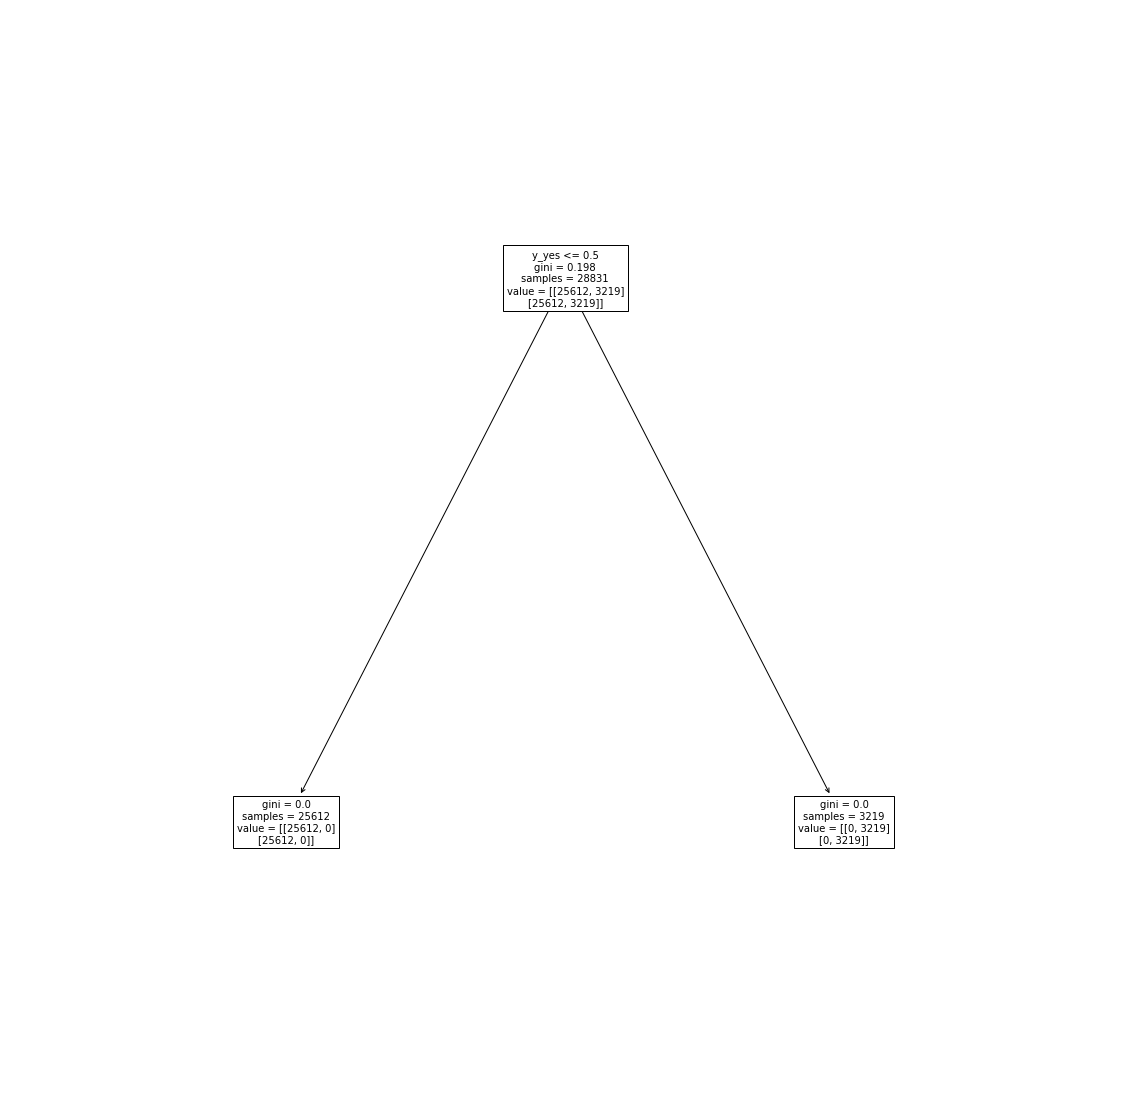

In [50]:
# Let's visualize the tree
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 20))
tree.plot_tree(clf, fontsize=10, feature_names=X.columns)
plt.show()